## This model is trained under different data sets from main.ipnyb 


In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.image import imread 
import cv2 
from matplotlib import image as mpimg
import random 
from os import listdir
from sklearn.preprocessing import LabelBinarizer 
from keras.preprocessing import image 
from keras.preprocessing.image import img_to_array , array_to_img
from keras.optimizers import Adam 
from keras.models import Sequential 
from keras.layers import Conv2D , MaxPooling2D , Activation , Flatten , Dropout , Dense 
from sklearn.model_selection import train_test_split 



2024-01-21 16:05:06.719926: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-21 16:05:06.758171: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-21 16:05:06.883032: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 16:05:06.883122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 16:05:06.889244: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
os.listdir()

['main.ipynb', '.git', '.gitignore', 'a', 'images', 'main2.ipynb']

In [3]:
os.listdir('images')[0]

'001.Black_footed_Albatross'

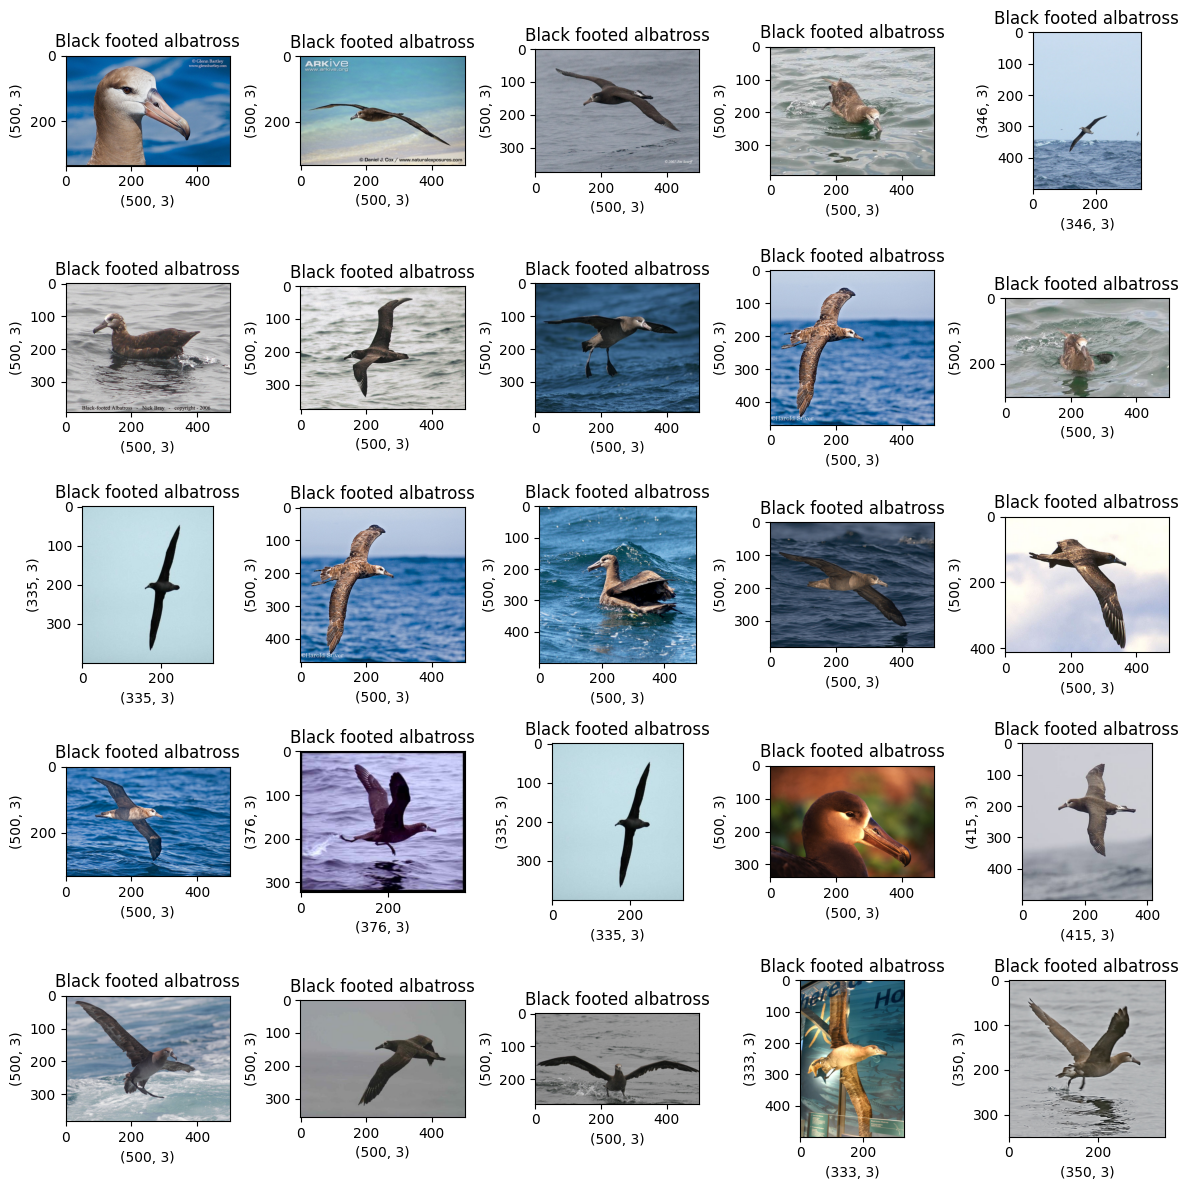

In [4]:
#plotting some images from 'black footed albatross 
import random 
plt.figure(figsize = (12  , 12 ))
black_footed_bird_path = 'images/001.Black_footed_Albatross/'
for i in range(1 , 26):
    plt.subplot(5  , 5 , i)
    plt.tight_layout()
    rand_img = imread(black_footed_bird_path + random.choice(listdir(black_footed_bird_path)))
    plt.imshow(rand_img)
    plt.title("Black footed albatross")
    plt.xlabel(rand_img[0].shape)
    plt.ylabel(rand_img[1].shape)

In [5]:
root =  '/home/ujjwal/ujjwal/Bird Species Prediction/' 
species_dir_list = listdir('/home/ujjwal/ujjwal/Bird Species Prediction/images/')
image_list = [] #emply images path list 
label_list = []#empty label list 
species_dir_list


['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet',
 '006.Least_Auklet',
 '007.Parakeet_Auklet',
 '008.Rhinoceros_Auklet',
 '009.Brewer_Blackbird',
 '010.Red_winged_Blackbird',
 '011.Rusty_Blackbird',
 '012.Yellow_headed_Blackbird',
 '013.Bobolink',
 '014.Indigo_Bunting',
 '015.Lazuli_Bunting',
 '016.Painted_Bunting',
 '017.Cardinal',
 '018.Spotted_Catbird',
 '019.Gray_Catbird',
 '020.Yellow_breasted_Chat',
 '021.Eastern_Towhee',
 '022.Chuck_will_Widow',
 '023.Brandt_Cormorant',
 '024.Red_faced_Cormorant',
 '025.Pelagic_Cormorant',
 '026.Bronzed_Cowbird',
 '027.Shiny_Cowbird',
 '028.Brown_Creeper',
 '029.American_Crow',
 '030.Fish_Crow',
 '031.Black_billed_Cuckoo',
 '032.Mangrove_Cuckoo',
 '033.Yellow_billed_Cuckoo',
 '034.Gray_crowned_Rosy_Finch',
 '035.Purple_Finch',
 '036.Northern_Flicker',
 '037.Acadian_Flycatcher',
 '038.Great_Crested_Flycatcher',
 '039.Least_Flycatcher',
 '040.Olive_sided_Flycatcher',
 '

In [6]:


for  species_dir in species_dir_list[:20]:
    species_dir_path = root + 'images/' + species_dir 
    for files in listdir(species_dir_path):
        file_path = species_dir_path +'/' +  files 
        image_read = cv2.imread(file_path)
        image_array = img_to_array(image_read)
        image_list.append(image_array)
        label_list.append(species_dir)
       

    
       
    

In [7]:
label_counts = pd.DataFrame(label_list).value_counts() #this is what balanced datasets looks like
label_counts

001.Black_footed_Albatross     60
010.Red_winged_Blackbird       60
014.Indigo_Bunting             60
013.Bobolink                   60
002.Laysan_Albatross           60
011.Rusty_Blackbird            60
004.Groove_billed_Ani          60
009.Brewer_Blackbird           59
019.Gray_Catbird               59
020.Yellow_breasted_Chat       59
003.Sooty_Albatross            58
015.Lazuli_Bunting             58
016.Painted_Bunting            58
017.Cardinal                   57
012.Yellow_headed_Blackbird    56
007.Parakeet_Auklet            53
008.Rhinoceros_Auklet          48
018.Spotted_Catbird            45
005.Crested_Auklet             44
006.Least_Auklet               41
Name: count, dtype: int64

In [8]:
print(image_list[0].shape)

(416, 500, 3)


In [9]:
from PIL import Image
import numpy as np

# Assuming image_list contains NumPy arrays representing images
# For example, if the first image has shape (416, 500, 3)

# Resize all images to a common size, e.g., (256, 256, 3)
target_size = (256, 256)
resized_images = [np.array(Image.fromarray((img * 255).astype(np.uint8)).resize(target_size)) for img in image_list]

# Convert the list of images to a NumPy array
np_images = np.array(resized_images, dtype=np.float16) / 255

# Now np_images should have a homogeneous shape


In [27]:
label_list.shape
np_images.shape

(1115, 256, 256, 3)

In [30]:
x_train , x_test , y_train , y_test   = train_test_split(np_images,label_list , test_size= 0.2 , random_state = 10  )

In [31]:
x_train  = np.array(x_train , dtype = np.float16)
x_test = np.array(x_test , dtype = np.float16)

In [33]:
x_train = x_train.reshape(-1 , 256 , 256 , 3 )
x_test  = x_test.reshape(-1 , 256 , 256)

In [40]:
from sklearn.preprocessing import LabelBinarizer

# Assuming y_train is a list of labels
# Instantiate the LabelBinarizer
lb = LabelBinarizer()

# Fit and transform the labels
y_train = lb.fit_transform(y_train)
y_test  = lb.fit_transform(y_test)

In [43]:
pd.DataFrame(y_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
890,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [44]:
print(lb.classes_)

['001.Black_footed_Albatross' '002.Laysan_Albatross' '003.Sooty_Albatross'
 '004.Groove_billed_Ani' '005.Crested_Auklet' '006.Least_Auklet'
 '007.Parakeet_Auklet' '008.Rhinoceros_Auklet' '009.Brewer_Blackbird'
 '010.Red_winged_Blackbird' '011.Rusty_Blackbird'
 '012.Yellow_headed_Blackbird' '013.Bobolink' '014.Indigo_Bunting'
 '015.Lazuli_Bunting' '016.Painted_Bunting' '017.Cardinal'
 '018.Spotted_Catbird' '019.Gray_Catbird' '020.Yellow_breasted_Chat']


In [45]:
#spliting tranning data to valdate data 
x_train , x_val , y_train ,y_val = train_test_split(x_train  , y_train , test_size= 0.2)

In [ ]:
model  = Sequential()
model.add(Conv2D())